#### Обработка данных

In [53]:
import pandas as pd
import numpy as np
import math as m

import plotly.plotly as py
import plotly.graph_objs as go

from scipy import optimize as opt
import scipy
import scipy.odr as odr

from statsmodels.stats.weightstats import *

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
data = pd.read_csv('data/experiment.csv') # Считываем данные

In [6]:
data.head(5)

,I,V
0,0.005,29.42
1,0.005,51.19
2,2.772,85.58
3,3.854,91.29
4,5.479,99.47


In [7]:
data.insert(2, 'V - IR', data['V'] - 5100*data['I']*0.001)

In [8]:
data.head(5)

,I,V,V - IR
0,0.005,29.42,29.3945
1,0.005,51.19,51.1645
2,2.772,85.58,71.4428
3,3.854,91.29,71.6346
4,5.479,99.47,71.5271


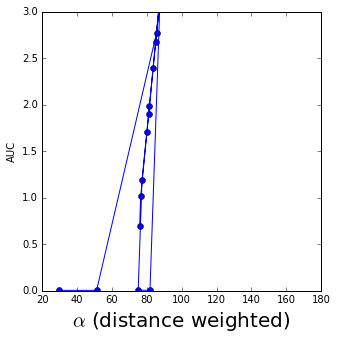

In [9]:
plt.figure(1, figsize=(5,5))
plt.plot(data['V'], data['I'], marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
plt.ylim((0, 3))
plt.show()

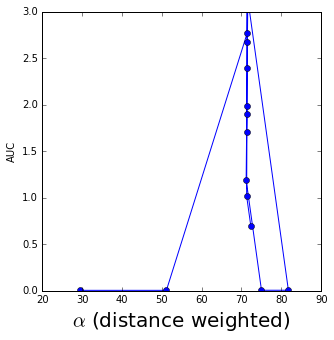

In [10]:
plt.figure(1, figsize=(5,5))
plt.plot(data['V - IR'], data['I'], marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
plt.ylim((0, 3))
plt.show()

In [12]:
U = [117.9, 100.93, 135.5, 95.6]

In [14]:
U = np.array(U) - (76.49 - 5.1*1.02)

In [16]:
U = U * (1/(1.02*0.001))

In [18]:
Rth = U

In [19]:
Rexp = np.array([1.9, 0.8, 2.4, 0.5])*100000

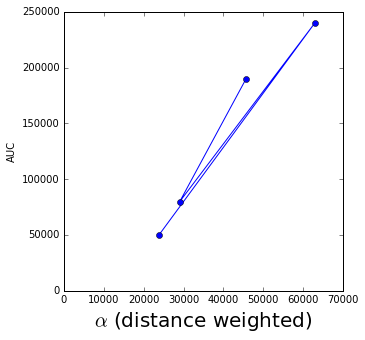

In [25]:
plt.figure(1, figsize=(5,5))
plt.plot(Rth, Rexp, marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
xlim((0, 70000))
ylim((0, 250000))


plt.show()

In [21]:
Rth

array([ 45698.03921569,  29060.78431373,  62952.94117647,  23835.29411765])

In [22]:
Rexp

array([ 190000.,   80000.,  240000.,   50000.])

In [45]:
C = np.array([5, 4, 3, 2])
T1 = np.reciprocal(np.array([57.7, 71.7, (100.6 + 98.7)/2, (167.0 + 179.0)/2]))

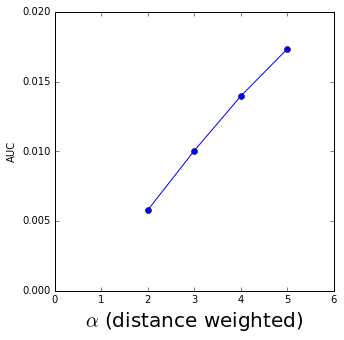

In [46]:
plt.figure(1, figsize=(5,5))
plt.plot(C, T1, marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
xlim((0, 6))
ylim((0, 0.02))
plt.show()

In [70]:
Re = np.array([9, 7, 5, 4, 3, 2])
T2e = np.reciprocal(np.array([19.9, 25.9, 35.9, 44.9, 59.9, 87.9]))
Rt = np.array([0.0, 10])
T2t = np.array([0.0, 15*1000*5*10**(-6)*m.log((106.2 - 76.49)/(106.2 - 85.6))])

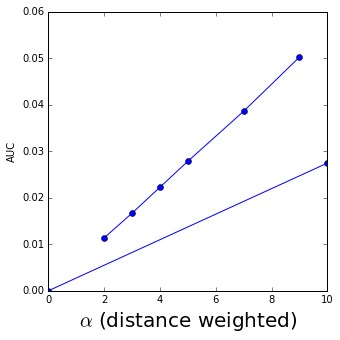

In [71]:
plt.figure(1, figsize=(5,5))
plt.plot(Re, T2e, marker='o', color='b')
plt.plot(Rt, T2t, marker='o', color='b')
#plt.plot(data['I'], data['B2'], marker='o', color='r')
plt.xlabel(r'$\alpha$ (distance weighted)', fontsize=20)
plt.ylabel('AUC')
xlim((0, 10))
ylim((0, 0.06))
plt.show()

In [63]:
T2t

array([ 0.        ,  0.01830963])

In [64]:
T2e

array([ 0.05025126,  0.03861004,  0.02785515,  0.02227171,  0.01669449,
        0.01137656])

In [81]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, Re, T2e, method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (0.0001322) + (0.0055422)*x
(+-)(0.0002063) + (+-)(0.0000373)*x


In [73]:
def f(x, a, b):
    return a + b*x

parameters_opt, parameters_cov = opt.curve_fit(f, C, T1, method='dogbox') #, sigma = data['sqr_Al'], absolute_sigma=True)
print("y  = ({:.7f}) + ({:.7f})*x".format(parameters_opt[0], parameters_opt[1]))
print("(+-)({:.7f}) + (+-)({:.7f})*x".format(np.sqrt(np.diag(parameters_cov))[0], np.sqrt(np.diag(parameters_cov))[1]))

y  = (-0.0017240) + (0.0038564)*x
(+-)(0.0005081) + (+-)(0.0001383)*x


In [74]:
T1

array([ 0.01733102,  0.013947  ,  0.01003512,  0.00578035])

In [75]:
C

array([5, 4, 3, 2])

In [77]:
Re*0.0055

array([ 0.0495,  0.0385,  0.0275,  0.022 ,  0.0165,  0.011 ])

In [78]:
T2e

array([ 0.05025126,  0.03861004,  0.02785515,  0.02227171,  0.01669449,
        0.01137656])

In [79]:
Re

array([9, 7, 5, 4, 3, 2])

In [82]:
C

array([5, 4, 3, 2])

In [83]:
T1

array([ 0.01733102,  0.013947  ,  0.01003512,  0.00578035])

In [84]:
0.0038564*C

array([ 0.019282 ,  0.0154256,  0.0115692,  0.0077128])